In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import random
random.seed(1337)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
path = os.path.join(os.getcwd(),  'TaroDataset')
print(path)

d:\Study\Code\AI\Taro_Disease_Classification\TaroDataset


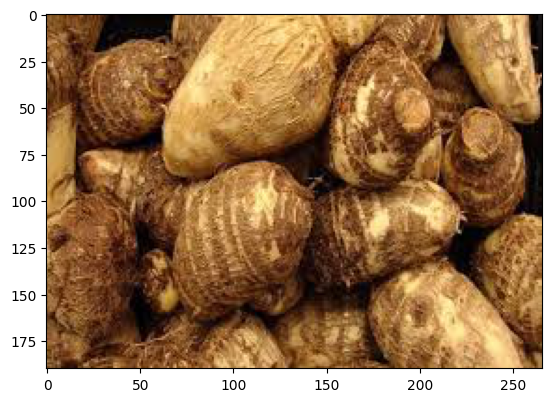

In [6]:
img = PIL.Image.open(os.path.join(path, 'test', 'HealthyTaro', 'healthy31.jpg'))
plt.imshow(img)

In [7]:
# config
batch_size = 32
img_height = 224
img_width = 224

In [9]:
# load test datagen for prediction
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(path, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')


Found 60 images belonging to 2 classes.


In [11]:
test_generator.class_indices

{'HealthyTaro': 0, 'UnhealthyTaro': 1}

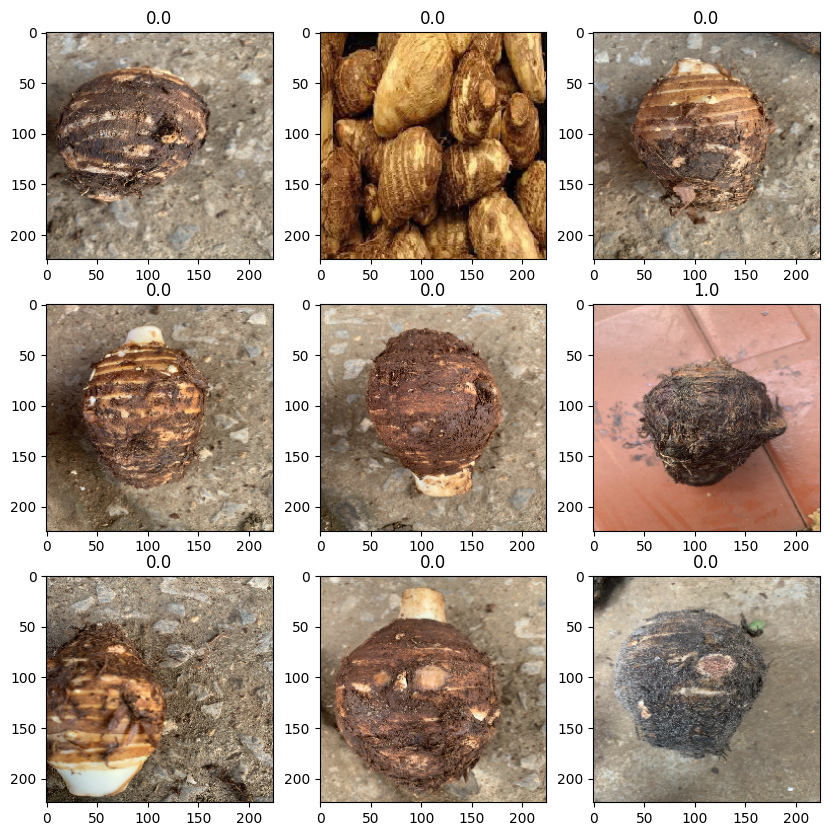

In [12]:
plt.figure(figsize=(10, 10))
x, y = test_generator.next()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i])
    plt.title(y[i])
    
plt.show()

In [15]:
os.getcwd()

'd:\\Study\\Code\\AI\\Taro_Disease_Classification'

In [32]:
# load model
model = tf.keras.models.load_model('test1_cnn.h5',compile=False)

1/1 [==============================] - 0s 26ms/step


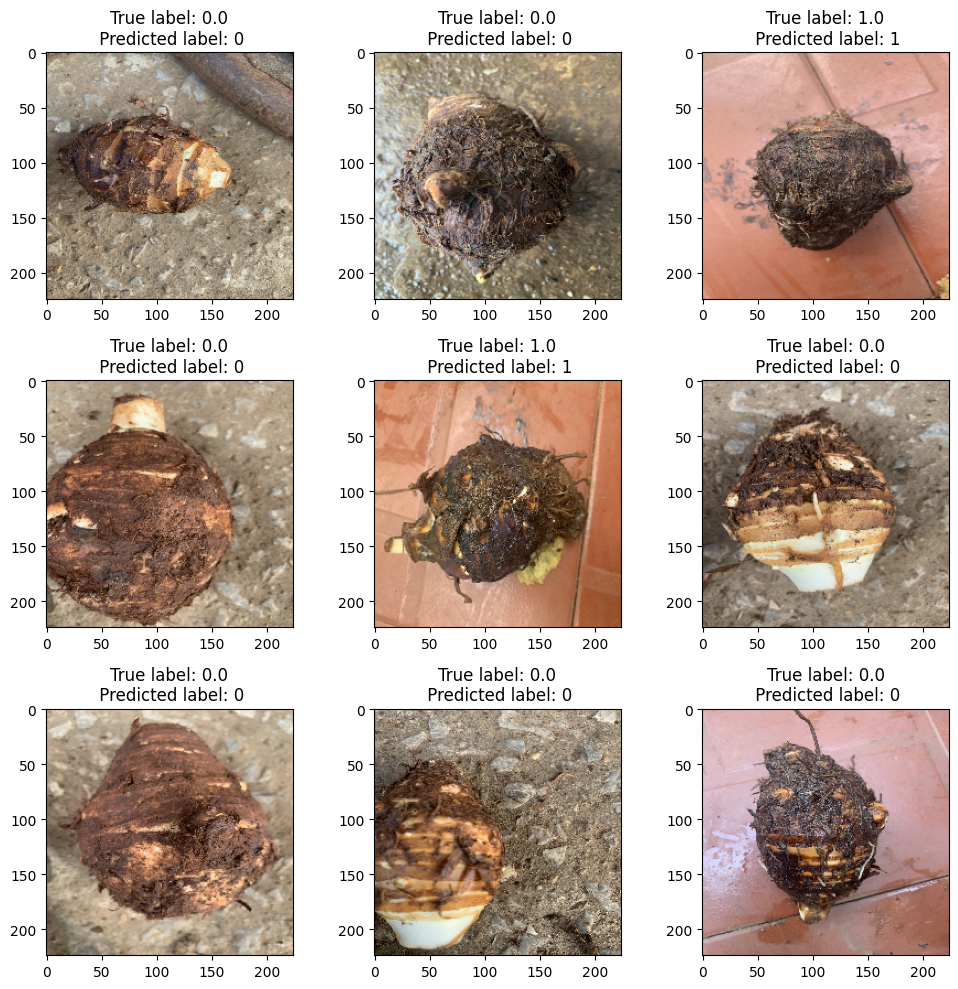

In [51]:
true_labels = []
predicted_labels = []
class_names = test_generator.class_indices.keys()
num_batches = len(test_generator)
for i in range(num_batches):
    x, y = test_generator.next()
    true_labels.extend(y)
    predicted_labels.extend(np.argmax(model.predict(x), axis=-1))

# print(true_labels)
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

plt.figure(figsize=(10, 10))
num_samples_to_display = min(9, len(true_labels))

for i in range(num_samples_to_display):
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i])
    plt.title(f'True label: {true_labels[i]}\n Predicted label: {predicted_labels[i]}')

plt.tight_layout()
plt.show()


In [41]:
len(pred)

60

In [49]:
pred = model.predict(test_generator)

pred = [np.argmax(i) for i in pred]


ValueError: in user code:

    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\minht\anaconda3\envs\gpu\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).
